## 📌 Heart Disease Prediction — Project Overview

## 🧩 Problem Statement
The goal of this project is to build a **Logistic Regression Model** to classify whether a patient has **Heart Disease** or not based on several medical health indicators. This is a binary classification problem.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
Heart Disease Dataset

## 🌐 Source  
UCI Machine Learning Repository / heart.csv

---

## 📐 Dataset Shape
- **Total Rows:** 1025  
- **Total Columns:** 14  

---

## 🧬 Dataset Columns
- **Age** – Age in years  
- **Sex** – (1 = male; 0 = female)  
- **CP** – Chest pain type (0-3)  
- **Trestbps** – Resting blood pressure  
- **Chol** – Serum cholesterol in mg/dl  
- **FBS** – Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
- **Restecg** – Resting electrocardiographic results  
- **Thalach** – Maximum heart rate achieved  
- **Exang** – Exercise induced angina (1 = yes; 0 = no)  
- **Oldpeak** – ST depression induced by exercise  
- **Slope** – The slope of the peak exercise ST segment  
- **CA** – Number of major vessels colored by flourosopy  
- **Thal** – Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)  
- **Target** – **Target Label** (0 = No Heart Disease, 1 = Heart Disease)

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X) — 13 Total
All clinical features from 'Age' to 'Thal' are used as predictors for the model.

## 🎯 Target (y)
- **Target** (0 = Healthy, 1 = Heart Disease Presence)

---

## 📚 Steps We Will Perform

1. **Data Loading:** Reading the heart.csv file.  
2. **Exploratory Data Analysis (EDA):** Checking for correlations and heart disease distribution.  
3. **Data Splitting:** Dividing data into training and testing sets (e.g., 80/20 split).  
4. **Feature Scaling:** Normalizing features for better model convergence.  
5. **Model Building:** Implementing the **Logistic Regression** algorithm.  
6. **Model Evaluation:** Measuring Accuracy, Precision, Recall, and F1-Score.  
7. **Confusion Matrix:** Visualizing true positives vs false positives.  

---

### import the lib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### load the dataset 

In [10]:
df=pd.read_csv("heart.csv")

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


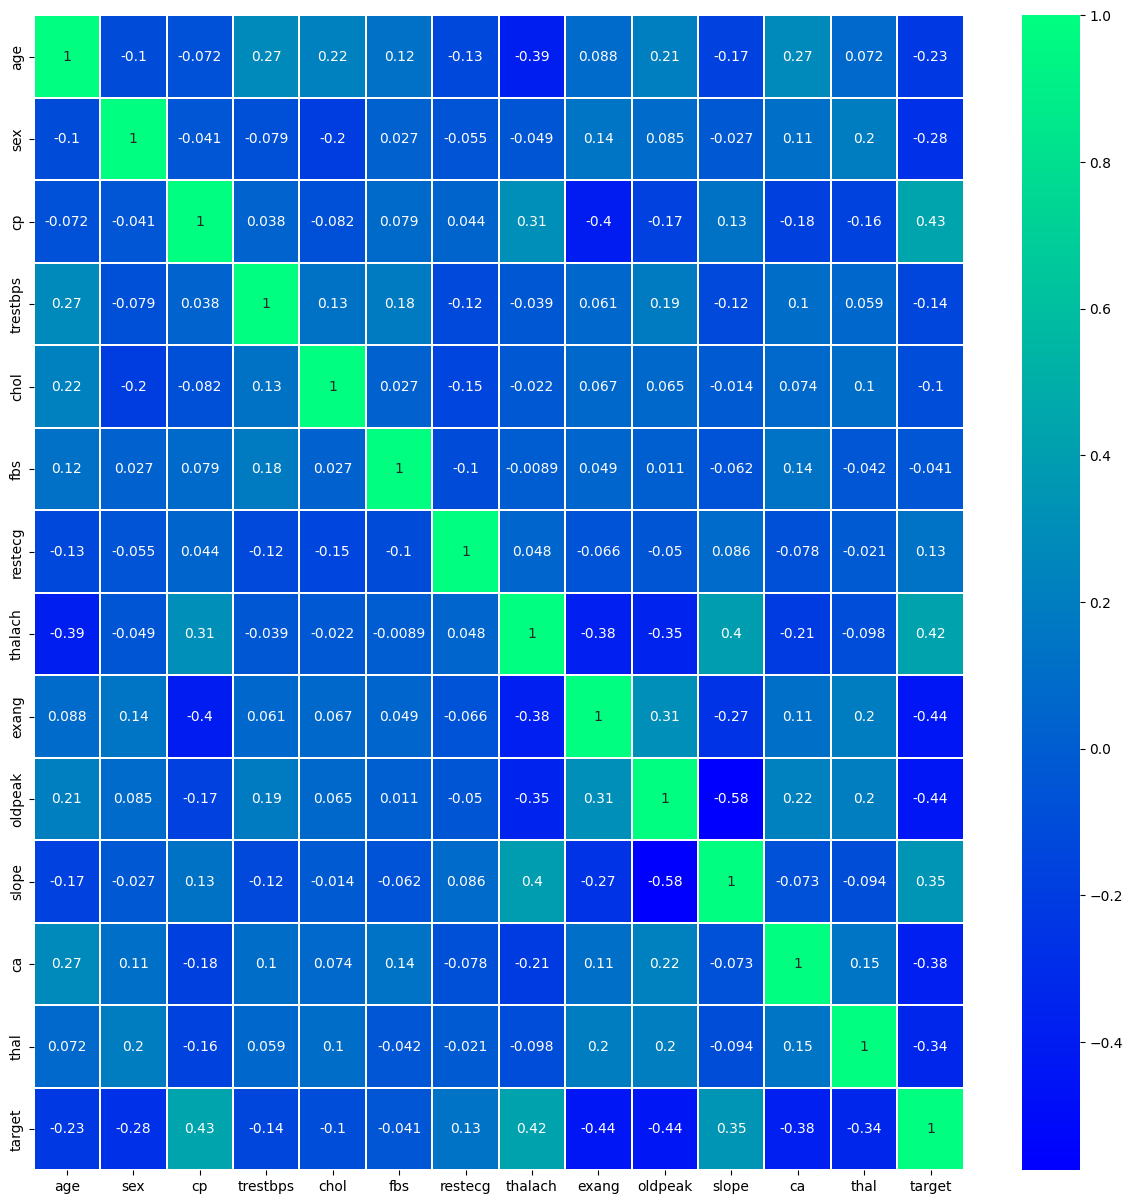

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap="winter")
plt.show()

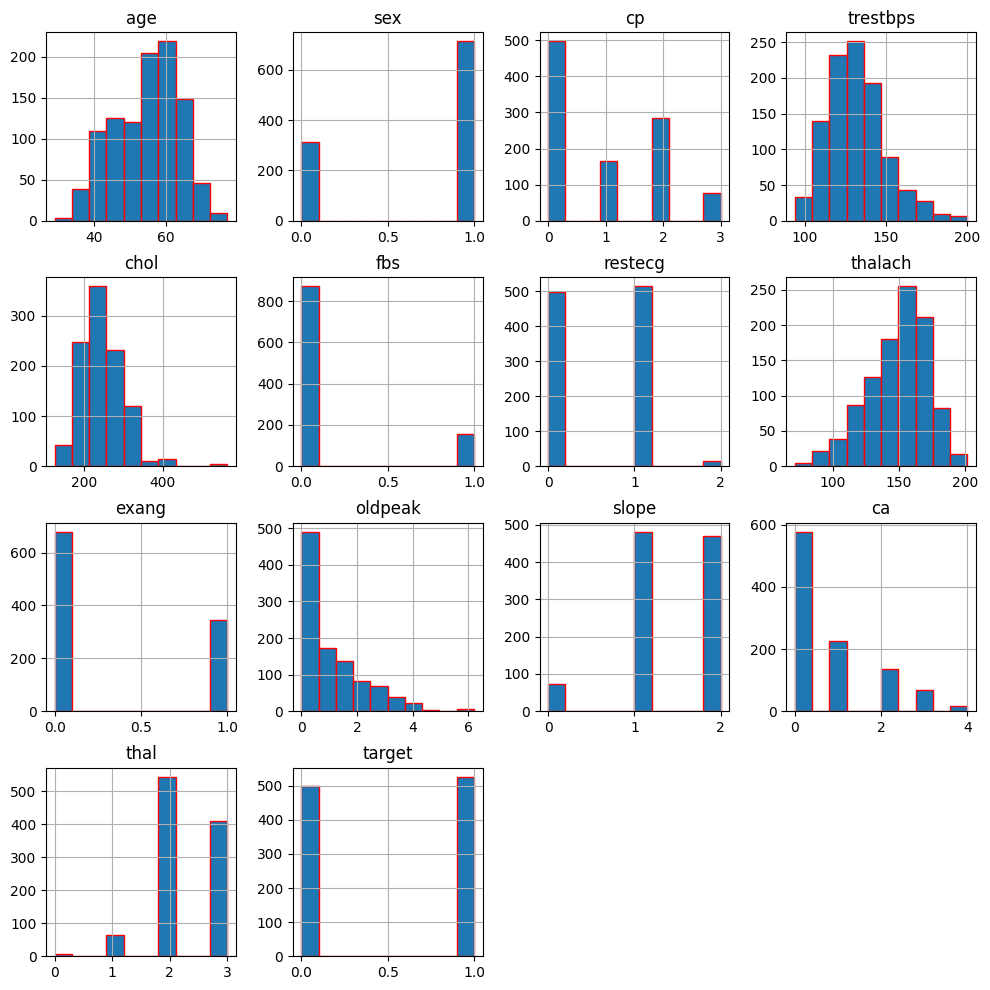

In [44]:
df.hist(figsize=(12,12),edgecolor='r')
plt.savefig('featureplot')

## now devide the dataset in to the label and the feature column

In [48]:
x=df.iloc[:,:-1]

In [50]:
y=df.target

In [52]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### now preprocess the dataset

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
x_scaler=scaler.fit_transform(x)

In [65]:
x_scaler

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

### now train test and split the data set

In [69]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=50)

In [75]:
x_test

array([[-0.15815703,  0.66150409,  1.02761788, ...,  0.99543334,
         2.17981673, -0.52212231],
       [ 1.38575679,  0.66150409, -0.91575542, ..., -0.6241209 ,
         1.20922066,  1.08985168],
       [ 1.82687503, -1.51170646, -0.91575542, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       ...,
       [ 0.61379988,  0.66150409, -0.91575542, ...,  0.99543334,
         0.23862459,  1.08985168],
       [ 1.27547724,  0.66150409, -0.91575542, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       [-1.26095261,  0.66150409,  1.02761788, ...,  0.99543334,
         0.23862459, -0.52212231]])

In [77]:
y_test

365    1
737    0
10     1
957    0
328    0
      ..
891    1
368    1
339    0
126    1
213    1
Name: target, Length: 257, dtype: int64

### now create the model such as 

In [81]:
from sklearn.linear_model import LogisticRegression

In [85]:
model=LogisticRegression()

# fit the model

In [88]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
model.score(x_test,y_test)

0.8287937743190662

### assuming you have: x_train, y_train, and regressor (your logistic model)


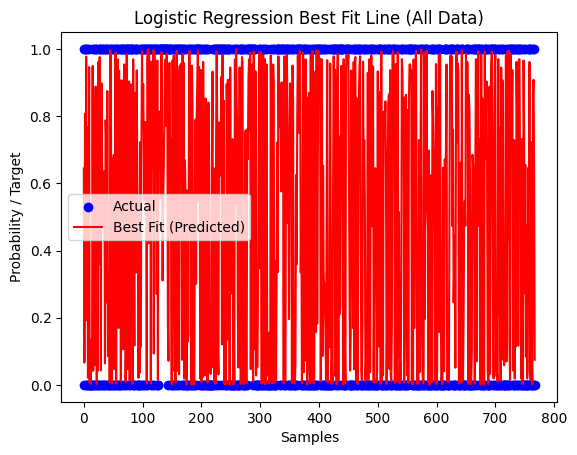

In [100]:
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), model.predict_proba(x_train)[:,1], color='red', label='Best Fit (Predicted)')
plt.title("Logistic Regression Best Fit Line (All Data)")
plt.xlabel("Samples")
plt.ylabel("Probability / Target")
plt.legend()
plt.show()


In [102]:
model.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [108]:
y_pred=model.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8287937743190662


### bothe give the correct of the score of the result

In [120]:
from sklearn.metrics import confusion_matrix

In [126]:
cm=confusion_matrix(y_test,y_pred)

In [130]:
cm

array([[ 90,  27],
       [ 17, 123]], dtype=int64)

In [134]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [142]:
print("Accuracy of the model is : ",(TP+TN)/(TP+TN+FN+FP))

Accuracy of the model is :  0.8287937743190662


In [144]:
print("precision of the metrix is : ",(TP)/(TP+FP))

precision of the metrix is :  0.7692307692307693


In [148]:
print("Sensitivity: ",TP/(TP+FN))

Sensitivity:  0.8411214953271028


In [ ]:
print("Specificity: ",TN/(TN+FP))